<div align ="right">Thomas Jefferson University <b>COMP 103</b>: Data Analysis and Visualization</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats 

# Means comparisons

So means comparisons are probably the meat and potatoes of a typical biostats class. Very often we want to compare two things, which are themselves variable, and ask - are these two things different from one another. 

## Sampling from a distribution

Ok. So the first thing we need to understand is the process by which statistical significance is generated. Let's do this by running through an example. We need to actually remind ourselves of the central limit theorem for this. So let's say that we have a very large population of adult ducks, and although we can't know this, let's pretend that we are granted omniscience for a second and come to know that for the body mass of these ducks the true population mean is 1 kg and that the true population standard deviation is exactly 0.25.

We can create this population, sample it, and graph the results using python:

/var/folders/fb/0kfmwrs50tj9_3nzybsq9fjnsc29tl/T/ipykernel_73471/564585721.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


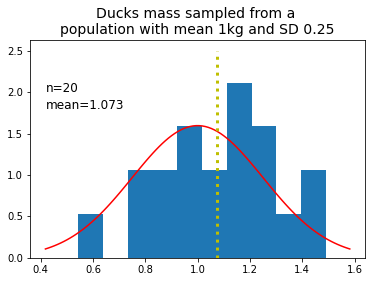

In [2]:
mean = 1
sd = 0.25
sample_size = 20

fig, ax = plt.subplots(1, 1)

sample = np.random.normal(mean, sd, sample_size)
#print(sample)
plt.hist(sample, density = 'true')

x = np.linspace(stats.norm.ppf(0.01, mean, sd), stats.norm.ppf(0.99,mean, sd),100)
y = stats.norm.pdf(x, mean, sd)
plt.plot(x,y, '-r') 

plt.title('Ducks mass sampled from a \npopulation with mean 1kg and SD 0.25', size = 14)
plt.text(stats.norm.ppf(0.01, mean, sd), 2.0, 'n='+str(sample_size), size = 12)
plt.text(stats.norm.ppf(0.01, mean, sd), 1.8, 'mean='+str(round(np.mean(sample),3)), size = 12)
plt.plot([np.mean(sample),np.mean(sample)],[0,2.5],':y', lw=3)

fig.show()

In the figure above the blue bars represent the histogram of our sample and the red line is the probability density function representing the population that the sample is drawn from. We know that the population mean is zero, the yellow dotted line represents the mean of our sample. Run the code above a few times. Note that each time we sample we get a slightly different result. And with only 20 values, we get some distributions that deviate substantially from normal! Try adjusting `sample_size` up and down. As the sample gets larger and smaller, we get closer or farther awary from something that looks like a normal distribution.

This is a fundamental truth about stats. Sometimes, just by chance alone, the values that we draw from a distribution are going to look substantially different than the parent distribution! Whenever we do an experiment or a study that involves a finite number of individuals, we are drawing values from a larger distribution, except that we don't know the actual mean and SD of the population.
***
But now let's do something else. Let's write a program that draws repeatedly from this distribution and calculates a mean value each time it does so. We will call this resampling the population and we will use the variable `resample` to describe how many times we do it. Then let's store all of those means we calculate as a list called `means`.

```
resample = 10000

means = []

for i in range(resample):
    sample_mean = np.mean(np.random.normal(mean, sd, sample_size)) 
    means.append(sample_mean)    
```


Question - explain what the code above will do:
* 
* 
* 
* 



Now let's plot the histogram of these means! Try changing the number of times we resample. 

/var/folders/fb/0kfmwrs50tj9_3nzybsq9fjnsc29tl/T/ipykernel_73471/2131873117.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


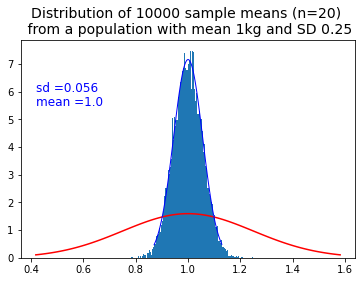

In [3]:
resample = 10000

means = []

for i in range(resample):
    sample_mean = np.mean(np.random.normal(mean, sd, sample_size)) 
    means.append(sample_mean)    

mean_of_means = np.mean(means)    
sd_means = np.std(means, ddof =1) # this is a sample standard deviation, so ddof = 1 tells us to divide 
                                  # the variance by n-1 instead of N 


fig, ax = plt.subplots(1, 1)

x = np.linspace(stats.norm.ppf(0.01, mean, sd), stats.norm.ppf(0.99,mean, sd),100)
y = stats.norm.pdf(x, mean, sd)
plt.plot(x,y, '-r') 

plt.hist(means, density = 'true', bins = round(10 + resample/100))
x = np.linspace(stats.norm.ppf(0.01, mean, sd_means), stats.norm.ppf(0.99,mean, sd_means),100)
y = stats.norm.pdf(x, mean_of_means, sd_means)
plt.plot(x,y, '-b',lw=1) 

plt.text(stats.norm.ppf(0.01, mean, sd), 6.0, 'sd ='+str(round(sd_means,3)), size = 12, color = 'blue')
plt.text(stats.norm.ppf(0.01, mean, sd), 5.5, 'mean ='+str(round(mean_of_means,3)), size = 12, color = 'blue')


plt.title('Distribution of '+str(resample)+' sample means (n='+str(sample_size)+') \n from a population with mean 1kg and SD 0.25', size = 14)

fig.show()

In this diagram the histogram represents the population of sample means. We shouldn't be surprised to see that these values are much much closer to the true population mean, and that the mean of the distribution is very close to our true mean of 1.0. The red line again is the probability distribution of the true population of ducks, which looks different only because the scale of the graph has changed.

****
Now we can ask an interesting question. Let's look at these sample means. When we sample 20 individuals from this population, how likely were we, via random chance alone, to get a sample mean that is greater than or equal to 1.15 (a number I've just picked for this demonstration)? 

One way to do that would be to use python to sift through our sample means and count all the means that are greater than or equal to 1.15:

In [4]:
#create a new list of 10,000 'means' by sampling the probability distribution again

resample = 10000
means = []
for i in range(resample):
    sample_mean = np.mean(np.random.normal(mean, sd, sample_size)) 
    means.append(sample_mean)    

sd_means = np.std(means, ddof=1)
mean_of_means = np.mean(means)


# Set the value ve are testing, and create a variable which we will use to count means > our target value 

value = 1.15
exceeds = 0                 

# for each mean in the list, see if it is greater than our value. If so, increase our counter by 1

for i in means:
    if i >= value:
        exceeds += 1

# calculate the frequency of means that exceed our target value        
        
p_sim= exceeds/len(means) 
        
print('Probability that the sample mean equals or exceeds '+str(value)+' = p_sim = '+str(round(p_sim,3)))

Probability that the sample mean equals or exceeds 1.15 = p_sim = 0.004


So we can interpret this results as saying ... when we sample 20 individuals from this population and calculate a mean, we expect that mean to be ≥ 1.15 0.4% of the time. So that probability is a p value. I am calling this value p_sim, because we generated it by simulating a data set, and then counting observations within that simulation. 

Now lets move one step closer to statistical tests. There is another way we can calculate this p value. We can take advantage of the fact that there exists an equation called cumulative distribution function - which is based on the probability density - that can be easilty computed for normal distribution of known mean and sd. The CDF measures how much of the area under the bell-shaped curve is accounted for by values up to a certain point on the x-axis. This doesn't require us to simulate. We can just plug the values into a function within the stats package like so:

In [7]:
# calculating a p value directly the cumulative distribution function

p = 1 - stats.norm.cdf(1.15, mean_of_means, sd_means)
print('Probability that the sample mean equals or exceeds '+str(value)+' = p = '+str(round(p,3)))

Probability that the sample mean equals or exceeds 1.15 = p = 0.004


Again, this is a p-value. So a **p-value** is the probability that a certain value will be observed in the data. Depending on what happened in your simulation, the two results you just generated should be either identical or very very close to one another. 

What we did here was too easy to be a real statistical test. We knew what the actual real mean and sd of the population were, so we asked, given that, what's the probability of seeing a particular result. And it turns out, that's not what we need statistics for. 

In the real world, we don't know the actual mean, so instead of comparing a known value to a known mean, we have to calculate a thing called a **test statistic**, which combines our data in meaningful ways - such as comparing the means of samples, or comparing a sample mean to a known value. The first test statistic we will look at is called the t-statistic, which forms the basis of the statistical test known as  ... 

## The t-test

There are 3 kinds of t-test, each of which is used for a different purpose. 

* In a **one-sample t-test**, we compare a sample mean to a known value and ask - "Is the sample mean different from this value?"
* In a **two-sample t-test**, we compare two samples and ask "Do these samples have different values"
* In a **paired t-test**, we ask "Is there a difference between two different measures of non-independent samples" 

### One-sample t-test
The simplest is the  1-sample t-test. Let's generate new data so we don't get confused. Let's assume we have a set of exam scores from a college course section that we will call section 1. This section has 32 students. We think that this instructor may be grading too easily for our department standard. The historical average at our college is a 75 in this course and we want to maintain that. So we get the grades and we calculate some simple statistics. 

In [8]:
exam1 = [86,78,67,91,79,83,66,86,86,87,80,73,78,78,70,79,73,75,76,86,66,91,77,68,79,90,84,78,80,85,93,94]
exam1_mean = np.mean(exam1)
exam1_sd = np.std(exam1, ddof=1) # sample standard deviation again!, so ddof = 1

print('section 1 mean = ' + str(round(exam1_mean,3)))
print('section 1 sd = ' + str(round(exam1_sd,3)))

section 1 mean = 80.062
section 1 sd = 7.874


So our instructor says - "Look, 80 isn't very different from 75, and there's a substantial standard deviation." So this gets us back very close to something like our question above. What we really want to know is - what is the probability that this sample represents random noise from sampling. The instructor is saying, this is just a sample drawn from a distribution with a true value of 75, and we want to attach a probability to that statement. 

Because we don't know the standard deviation of the true population, we have to use a test statistic. The t-statistic is calculated using this equation:
![Equation for the t-statistic](images/t-stat.png "Equation for the t-statistic")
Where m is the sample mean, mu is the value we are testing against, s is the standard deviation of the sample, and n is the sample size. In the box below I calculate this manually, and then show a python function from the `stats` library that does the same thing


In [9]:
### Manual calculation
n = len(exam1)
mu = 75
print((exam1_mean-75)/(exam1_sd/n**(1/2)))

### Calculation using stats package, extraction of t-statistic from result (we will come back to this)
onesided = stats.ttest_1samp(exam1,75)
print(onesided.statistic)


3.637125640781367
3.637125640781367


Ok, so now we've generated our t-statistic. So what do we do with it? 

First off let's think about it's properties. Look up at the equation above. As you can see, as the difference between the values gets larger, our test statistic is going to be larger. For a given sample size n, as the difference between the means grows, the test statistic is going to get larger. As the amount of variance in the sample grows, however, the test statistic is going to get smaller. So the t-statistic is a kind of ratio between the difference weighted by how variable the sample is. So we ask, what is the probability that our test statistic is this large or larger?

The way we would traditionally do this is to use a 'table' of t values. To use this table we need to know several things. 
* We need the t-statistic that we just calculated. 
* We need to know the degrees of freedom of our comparison. We talked a little bit about degrees of freedome earlier in the course, for a t-test the degrees of freedom of the comparison is the sample size - 1, or n-1. In our case this is 31. 
* Another thing we need to know is whether we are using what is known as a one-tailed or a two-tailed t-test. At one-tailed t-test is used when we are asking if the sample is the same or different than a particular value. A one-tailed test is used when we are specifically asking if our sample is 'greater than' or 'less than'. That is, that there is a directionality to our expectation. Two-tailed t-tests are more conservative, and that's what we will use for the duration of this worksheet. 
* Finally, we have to specify a level of significance that we will accept as the threshhold between two things being different or the same. Our p-value is going to tell us the probability of observing a t-statistic of a particular size. So we need to make an arbitrary choice. The most commonly used threshhold for statsitical significane in parametric tests is 0.05, which translates into "if the t-statistic is this high or higher, there is only a 5 percent chance that we would have observed the sample mean due to random variation". If the real mean were our comparison mean, mu, given the sample size and the means difference we would only generate the sample mean 5 percent of the time. 


http://www.ttable.org/uploads/2/1/7/9/21795380/published/9754276.png?1517416376

So if we go to the two-tailed value of 0.05 across the top, and down to the closest df to ours (30) we see a table value of 2.042 . Look above this window. Our t-statistic is 3.637. Since our t-statistic is higher, we can say the difference between our sample mean and the target value is statistically significant at the 0.05 level. 

But we can go a step further with the table, let's move to the right. It turns out that if we look at the 0.01 level (2.750) our result is also greater than the table value. So we can say the difference between our sample mean and the target value is statistically significant at the 0.01 level. With parametric stat, a significance level of 0.01 is usually considered to be not just statistically significant, but highly significant.

Now, if we go to the final column, where the p value is 0.001, we see that our result just barely exceeds the table value. So we can express our results as follows:  p < 0.001. This is a very highly significant result. 
***
So that's our test. Now here's a cool thing we can do with computers. We don't actually have to use tables any more. When we ran the t-test above, it actually generated two values, the `statistic` which is the t-statistic for the test, and `pvalue` which is the p-value for that t-statistic and sample size. The p-value generated in this way is known as an exact p value, so this is the probability that means difference observed is 0.000990, which matches our observation from the table that we just barely exceeded significance at the 0.001 level. 

In [10]:
print(onesided)
print('t-statistic = ' + str(round(onesided.statistic,3)))
print('p-value = ' + str(round(onesided.pvalue,5)))

Ttest_1sampResult(statistic=3.637125640781367, pvalue=0.0009900998547100663)
t-statistic = 3.637
p-value = 0.00099


So this brings us to our next question. How should we interpret this? One thing to train yourself to do is to limit your intrepretations to what the t-test actually shows. Does this mean that this teacher is an easy grader? In this case, I would say that the intrepretation is this - the grades in this class section are extremely unlikely to be the result of random sampling from the underlying distribution. Either the teacher is more effective at teaching the material, or has lower grading standards, or a group of dispropotionately bright students somehow ended up in this section. Our test doesn't allow us to distinguish between those explanations. But we can say that the exam scores in this class are very highly significantly different from the average. 

### T-tests and sample size

Ok, let's do another thing. I want you to make a prediction before you run the next bit of code. What if we had a class that was just as different from the other class in terms of the mean and had a similar standard deviation, but we were working with a much smaller group of students? Let's say 8 students, for fun. We'll call this group exam1s for 'small'.

Predict what you think is going to happen with our test:

* 
* 
* 


In [11]:
exam1s = [69,75,82,85,82,89,75,82]
exam1s_mean = np.mean(exam1s)
exam1s_sd = np.std(exam1s, ddof=1)

print('section 1s mean = ' + str(round(exam1s_mean,3)))
print('section 1s sd = ' + str(round(exam1s_sd,3)))


onesideds = stats.ttest_1samp(exam1s,75)

print('t-statistic = ' + str(round(onesideds.statistic,3)))
print('p-value = ' + str(round(onesideds.pvalue,5)))


section 1s mean = 79.875
section 1s sd = 6.424
t-statistic = 2.146
p-value = 0.06898


Now run the code block above. How would you interpret this result?

* 
* 
* 


Here we can see that sample size has a huge impact on our test. The magnitude of the factor we were looking at was exactly the same, but the sample size was smaller. This reduced the power of the test to detect differences, and so in this case we were unable to reject the null hypothesis that the two groups were NOT more different than would be expected by random chance alone. 

Let's try this in the other direction. In the code block below we have a class section with 100 students, but the mean is only slightly different from our expected mean of 75 (I have manipulated the data so that the mean is about 77, but the SD remains the same). What do you predict you will see?

* 
* 
* 


In [12]:
exam1l =[90,86,70,74,63,85,66,89,69,76,81,81,79,85,85,72,88,69,84,78,87,74,60,77,79,72,88,83,78,74,73,69,79,70,64,69,74,73,79,80,79,71,86,74,85,82,77,76,86,65,84,74,81,74,81,70,85,79,92,76,84,73,79,77]

exam1l_mean = np.mean(exam1l)
exam1l_sd = np.std(exam1l, ddof=1)

print('section 1l mean = ' + str(round(exam1l_mean,3)))
print('section 1l sd = ' + str(round(exam1l_sd,3)))


onesidedl = stats.ttest_1samp(exam1l,75)

print('t-statistic = ' + str(round(onesidedl.statistic,3)))
print('p-value = ' + str(round(onesidedl.pvalue,5)))

section 1l mean = 77.531
section 1l sd = 7.191
t-statistic = 2.816
p-value = 0.00649


Interpret what you saw when you ran the code block above:
* 
* 
* 


A final thought is that you will need to be careful not to misinterpret the p-value as measuring the strength of the effect, or the size of the difference. With more samples, we will have lower p-values and more highly significant differences in our comparisons. But as we saw in this example, the difference between the groups was less, we were just able to generate a stronger t-statistic because we had a larger sample size. An important term to keep in mind is **effect strength** which in terms of a means comparison is just the difference between the means. With enough data, you can generate results that have high statistical significance while measuring differences that might not have much practical significance. 

### Two-sample t-test

In a two-sample t-test (or independent sample t-test) we are comparing the means of two different populations. In order to generate a t-stastic and p-value from sample data, we had to make a few assumptions. The major assumption is that in the population from which the sample was drawn our variable of interest had a normal distribution. It's this assumption of a normal distribution that allows the p-value to be derived. 

In a two-sample t-test, one way of thinking about what we are asking is to ask if our samples are drawn from the same population, or from different populations. This introduces new assumptions. The major ones are:
* both samples are drawn from populations with a normal distribution
* both samples are drawn from populations with similar variance
* our sample populations are the same size

There are tests for these assumptions that you would learn about in a biostat class, and being aware of these assumptions is part of good statistical practice. In our examples we will make sure that these assumptions are met. In the case of the third assumption, python will automatically compensate if you give it two samples that are not identical size, and perform a Welch test, which does not depend on this assumption.

So let's go back to our class of students, and now introduce exam scores from a different section. In this case, we are going to directly compare the means of two samples. Our t-statistic is calculated slightly differently:
![two sample t-test equation](images/2samplet.png "two sample t-test equation")
Everything here should be self explanatory except for s<sub>p</sub>, which represents the pooled variance. In the case where sample sizes are equal, it's just the average variance of the two groups. 

In [13]:
# new data from a second class section
exam2 = [77,77,67,69,80,81,64,79,78,77,73,70,65,73,83,88,75,75,70,68,70,75,71,75,79,83,87,95,67,72,83,68]
exam2_mean = np.mean(exam2)
exam2_sd = np.std(exam2, ddof = 1)

#compare data to see if we are at least close to assumptions
print('section 1 mean = ' + str(round(exam1_mean,3)))
print('section 1 sd = ' + str(round(exam1_sd,3)))
print('section 2 mean = ' + str(round(exam2_mean,3)))
print('section 2 sd = ' + str(round(exam2_sd,3)))
print()

# run t test

twosided = stats.ttest_ind(exam1,exam2)
print('t-statistic = ' + str(round(twosided.statistic,3)))
print('p-value = ' + str(round(twosided.pvalue,5)))


section 1 mean = 80.062
section 1 sd = 7.874
section 2 mean = 75.438
section 2 sd = 7.193

t-statistic = 2.453
p-value = 0.01698


Interpret the results of the code you just ran above

* 
* 
* 


### Bar plots, error bars and the 95% confidence interval

Ok, so a great way to present the results of a means comparison is to use a bar graph. Bar graphs are great for presenting means for comparisons. Below I show a really simple ugly bar plot of this data with mostly the default settings. *(I usually don't like cutting off the y axis like this so as not to distort the data, in this case I think it's ok because everyone understands that average test scores really only vary over a limited range.)* 

(60, 100)

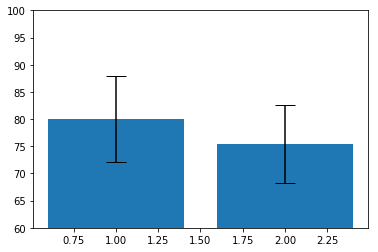

In [14]:
plt.bar([1,2],[exam1_mean,exam2_mean], yerr=[exam1_sd, exam2_sd], capsize =10)
plt.ylim(60,100)

Note here that I used the sample standard deviations to set the size of my error bars. Standard deviations are not themselves particularly informative on a graph showing a statistical results, since what we are really asking about is whether the means are different. As we saw above, samples with the same standard deviation and means difference can be significantly different or not depending on the sample size and thus the power of the test to detect difference. 

Another approach is to therefore use the 95 percent confidence interval of the means (95%CI). This is kind of like the inverse of the 0.05 confidence level. Given a sample, we are saying the true mean lies within this interval 95% of the time. These intervals do depend on sample size, and a good rule of thumb with a t-test is that if the 95% CI of the means fail to overlap the other groups mean, you won't see a significant difference. That makes them ideal for plotting on a graph.  

The code for calculating the 95% CI is based on the stats function <a href ='https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html'>stats.t.interval</a>. Note that instead of using the standard deviation in this equation we use the standard error of the mean. 

In [15]:
exam1_95CI = stats.t.interval(alpha=0.95, df=len(exam1)-1, loc=exam1_mean, scale=stats.sem(exam1)) 
exam2_95CI = stats.t.interval(alpha=0.95, df=len(exam2)-1, loc=exam2_mean, scale=stats.sem(exam2))
print(exam1_95CI)
print(exam2_95CI)

(77.22370974579155, 82.90129025420845)
(72.84418067793314, 78.03081932206686)


## Exercise 1: 
In the code window below, make a nice bar graph that improves on the one above. Incorporate the 95%CIs as the error bars. Report the results of the t-test somewhere on the graph window. 

In [ ]:
#Make a bar graph of the two-sample t-test results



## Exercise 2:

Use the following data and perform a two-sample t-test. You are studying fiddler crabs. You propose that perhaps fiddler crab males, who are encumbered with a large claw, may have to pay a price in terms of their escape speed. You measure 24 male and 24 female fiddler crabs and measure their speed in m/sec. Perform the appropriate t-test, graph the results, and report and interpret your results below. 

males (0.326,0.078,0.299,0.320,0.495,0.333,0.342,0.271,0.326,0.355,0.288,0.250,0.452,0.163,0.372,0.453,0.151,0.368,0.266,0.135,0.134,0.384,0.249,0.356)

females
(0.453,0.422,0.492,0.273,0.479,0.265,0.469,0.526,0.572,0.420,0.411,0.385,0.597,0.314,0.413,0.454,0.299,0.309,0.586,0.344,0.480,0.386,0.304,0.441)



In [ ]:
# compare the two groups to one another using a two sample t.test 

Report and interpret your results here

* 
* 
* 


### Paired t-tests
This is a lot of material, paired t-tests will have to wait until part II. 

![TJU logo image](images/TJU_logo_image.png "TJU logo image")

In [ ]:
## Functions for generating test scores
## 45

scratch = np.random.normal(0.4, 0.1, 24)
for i in scratch:
    print('{:.3f}'.format(i) + ',',end='') 
print()    
print(np.mean(scratch))
print(np.std(scratch, ddof = 1))